Imported libs

In [1]:
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly
import plotly.graph_objects as go
import datetime as dt
import requests
from plotly.subplots import make_subplots
import seaborn as sns

Reading data_sheet from the xlsx file and converting it to a data_frame using pandas

In [3]:

data_frame = pd.read_excel('https://storage.googleapis.com/venkat-alapati/dashboard-data-latest.xlsx',sheet_name='2. Data')

Used shape to see the size of the data set


In [4]:
data_frame.shape

(121084, 31)

Finding Null data in the given data set

In [5]:

null_data_hpd = data_frame.notnull()
null_data_hpd.head(5)

,row_id,code,country,region_code,region,region.1,wave,month,year,indicator_topic,...,unit_measure,measure_type,GDP_pc,ln_GDP_pc,weight_type,footnote,survey_producer,survey_link,last_updated,source
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,True,True


counting missing values in each column

In [6]:
for column in null_data_hpd.columns.values.tolist():
    print(null_data_hpd[column].value_counts())
    print('')

True    121084
Name: row_id, dtype: int64

True    121084
Name: code, dtype: int64

True    121084
Name: country, dtype: int64

True    121084
Name: region_code, dtype: int64

True    121084
Name: region, dtype: int64

True    121084
Name: region.1, dtype: int64

True    121084
Name: wave, dtype: int64

True     121080
False         4
Name: month, dtype: int64

True    121084
Name: year, dtype: int64

True    121084
Name: indicator_topic, dtype: int64

True    121084
Name: indicator, dtype: int64

True    121084
Name: indicator_display, dtype: int64

True    121084
Name: indicator_val, dtype: int64

True     115490
False      5594
Name: urban_rural, dtype: int64

True    121084
Name: industry, dtype: int64

True    121084
Name: sample_subset, dtype: int64

True     121080
False         4
Name: sample_total, dtype: int64

False    83941
True     37143
Name: FCS, dtype: int64

True    121084
Name: income_group, dtype: int64

True    121084
Name: lending_category, dtype: int64

True    12

Understading the data set 
Used info() method for know the features and value types in the data set

In [7]:

data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121084 entries, 0 to 121083
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 121084 non-null  int64  
 1   code                   121084 non-null  object 
 2   country                121084 non-null  object 
 3   region_code            121084 non-null  object 
 4   region                 121084 non-null  object 
 5   region.1               121084 non-null  object 
 6   wave                   121084 non-null  object 
 7   month                  121080 non-null  float64
 8   year                   121084 non-null  int64  
 9   indicator_topic        121084 non-null  object 
 10  indicator              121084 non-null  object 
 11  indicator_display      121084 non-null  object 
 12  indicator_val          121084 non-null  float64
 13  urban_rural            115490 non-null  object 
 14  industry               121084 non-nu

Used value_counts method like the one below to explore and clean all column features



In [8]:
data_frame['measure_type'].value_counts()

p    116914
c      4170
Name: measure_type, dtype: int64

After understanding data identified  ambiguity and repeated features. And Dropped the duplicate and irrelavent features

In [10]:

df_covid=data_frame.drop(['code','region_code','row_id','last_updated','region.1','survey_link','survey_producer',
'lending_category','indicator_val','footnote','GDP_pc','indicator_description','indicator','indicator_display',],axis=1)

Verifying new data frame features

In [11]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121084 entries, 0 to 121083
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   country          121084 non-null  object 
 1   region           121084 non-null  object 
 2   wave             121084 non-null  object 
 3   month            121080 non-null  float64
 4   year             121084 non-null  int64  
 5   indicator_topic  121084 non-null  object 
 6   urban_rural      115490 non-null  object 
 7   industry         121084 non-null  object 
 8   sample_subset    121084 non-null  int64  
 9   sample_total     121080 non-null  float64
 10  FCS              37143 non-null   object 
 11  income_group     121084 non-null  object 
 12  unit_measure     121084 non-null  object 
 13  measure_type     121084 non-null  object 
 14  ln_GDP_pc        120240 non-null  float64
 15  weight_type      121084 non-null  object 
 16  source           121084 non-null  obje

Removed All null,NAN rows from the data set.
It will create a medium sized subset with no missing values or blank spaces presnted in the data set


In [12]:
df_covid.dropna(inplace=True)
df_covid.shape


(35192, 17)

Changing sample_subset ,sample_total ,Month and Year cloumns data type from float to int


In [13]:
df_covid["sample_total"] = df_covid["sample_total"].astype('int')
df_covid["month"] = df_covid["month"].astype('int')
df_covid["year"] = df_covid["year"].astype('int')
#Seeing details of updated datatype
df_covid.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35192 entries, 0 to 121083
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          35192 non-null  object 
 1   region           35192 non-null  object 
 2   wave             35192 non-null  object 
 3   month            35192 non-null  int64  
 4   year             35192 non-null  int64  
 5   indicator_topic  35192 non-null  object 
 6   urban_rural      35192 non-null  object 
 7   industry         35192 non-null  object 
 8   sample_subset    35192 non-null  int64  
 9   sample_total     35192 non-null  int64  
 10  FCS              35192 non-null  object 
 11  income_group     35192 non-null  object 
 12  unit_measure     35192 non-null  object 
 13  measure_type     35192 non-null  object 
 14  ln_GDP_pc        35192 non-null  float64
 15  weight_type      35192 non-null  object 
 16  source           35192 non-null  object 
dtypes: float64(

Understanding each future using value_counts method

In [14]:
data_frame['income_group'].value_counts()

Upper middle income    38543
Low income             38462
Lower middle income    38332
High income             5747
Name: income_group, dtype: int64

Writing the cleaned data to a csv file

In [17]:
#df_covid.to_csv('https://storage.googleapis.com/venkat-alapati/dashboard-data-clean.csv')

Visualizing entire dataset with respect to country 


A rough look at entire data set through pairplot method


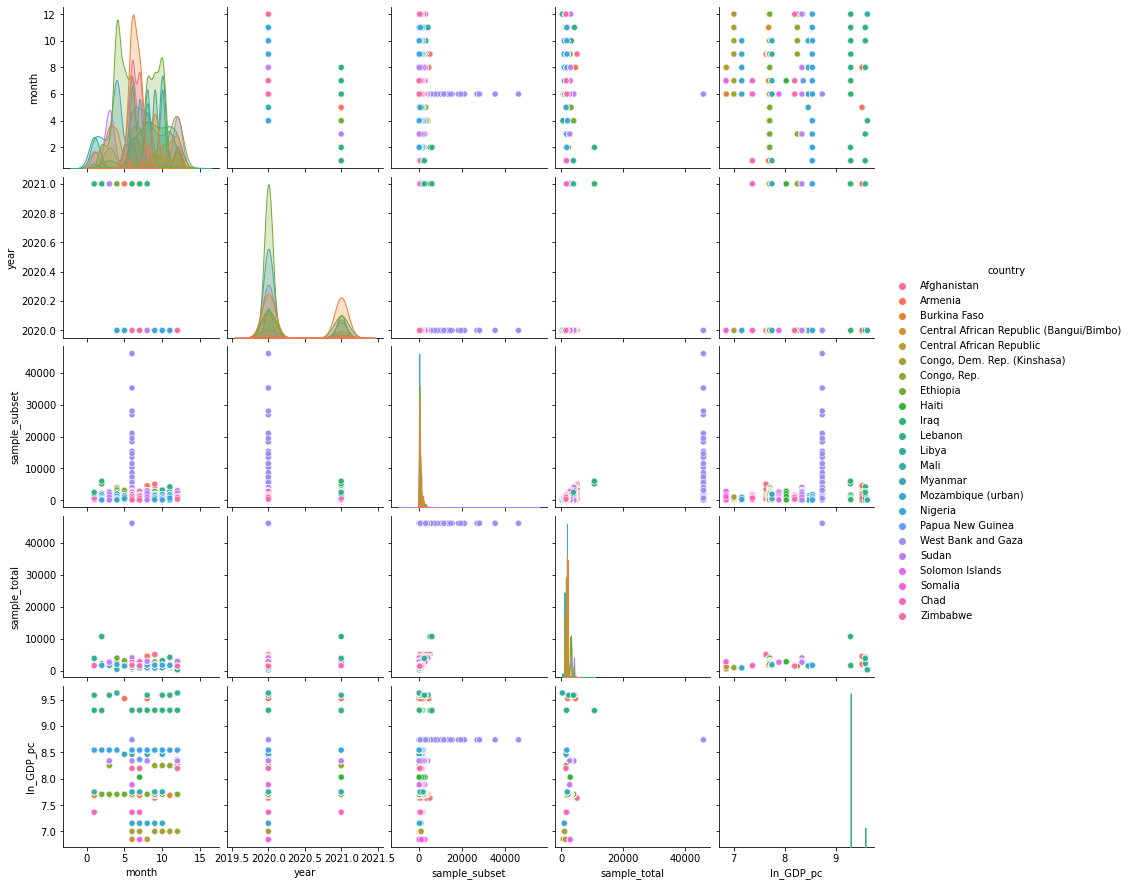

In [16]:

sns.pairplot(df_covid,hue = 'country')
print('A rough look at entire data set through pairplot method')

Plotting pie charts to view the prportions of Population,Intcome and intensity from the survey


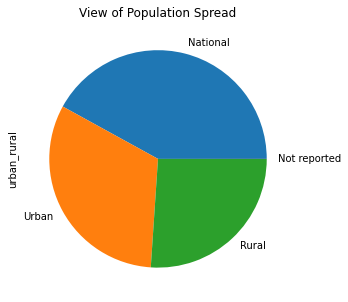

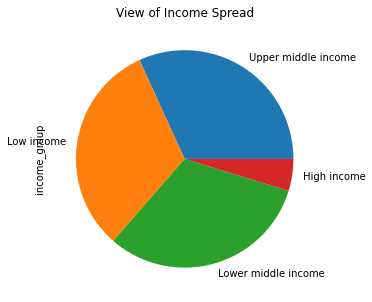

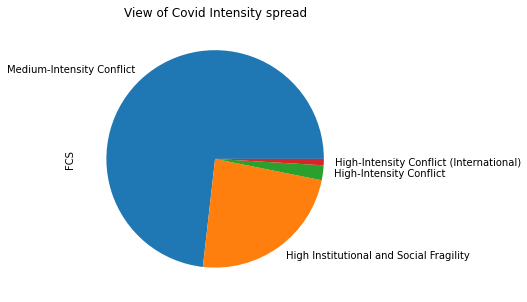

In [18]:
df_plot=data_frame['urban_rural'].value_counts()
df_plot.plot(kind = 'pie', y='urban_rural ', figsize=(5, 5))
plt.title('View of Population Spread')
plt.show()

df_plot=data_frame['income_group'].value_counts()
df_plot.plot(kind = 'pie', y='income_group', figsize=(5, 5))
plt.title('View of Income Spread')
plt.show()

df_plot=data_frame['FCS'].value_counts()
df_plot.plot(kind = 'pie', y='FCS', figsize=(5, 5))
plt.title('View of Covid Intensity spread')
plt.show()

Plotting top 10 countires by the total survey sample 


In [19]:
top10_countries = pd.DataFrame(df_covid.groupby('country')['sample_total'].sum().nlargest(10).sort_values(ascending = False))
fig1 = px.scatter(top10_countries, x = top10_countries.index, y = 'sample_total', size = 'sample_total', size_max = 120,
                color = top10_countries.index, title = 'Top 10 Countries by Total_sample_collected ')
fig1.show()

Plotting barh Graph for Country Wise covid Intensity based on conflict type


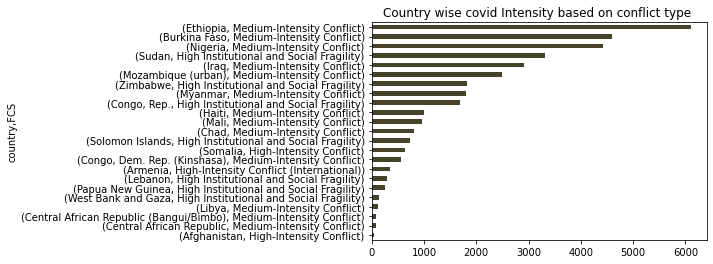

In [20]:
df_plot = pd.DataFrame(df_covid,columns=['country','FCS']).value_counts()
df_plot.sort_values(ascending=True,inplace=True)
df_plot.plot(x = 'country',
        y = 'FCS',
        kind = 'barh',
        color = '#454329',
        title = 'Country wise covid Intensity based on conflict type ',
        legend = False)
plt.show()

Finding correlation among Numeric Features of data set

We can observe that all features were weekly correlated


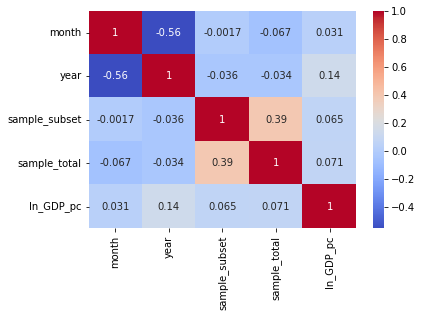

In [21]:
corrMatrix = df_covid.corr()
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')
print("We can observe that all features were weekly correlated")


Visualizing countries effected by Waves using Scatter plot


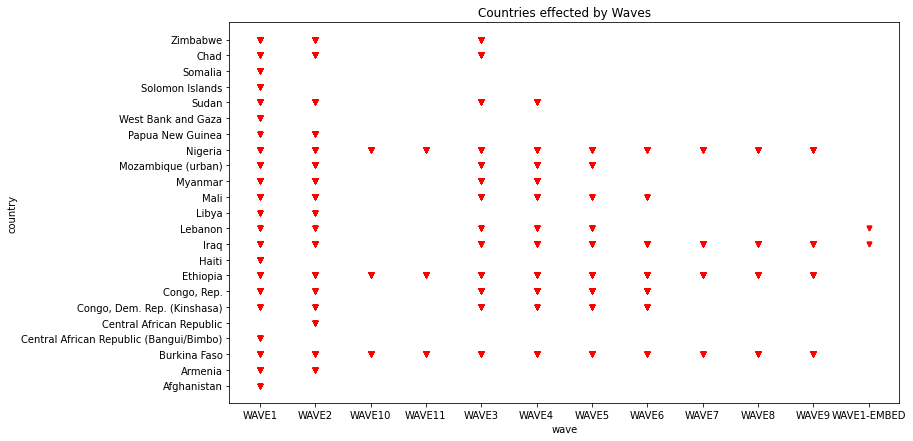

In [22]:
df_plot = pd.DataFrame(df_covid,columns=['country','wave'])
df_plot.plot(kind='scatter',x='wave',y='country',style='xx',color="red",figsize=(12,7),marker='v')
plt.title('Countries effected by Waves')
plt.xlabel('wave')
plt.show()

Visualizing countries effected over motnths using Scatter plot


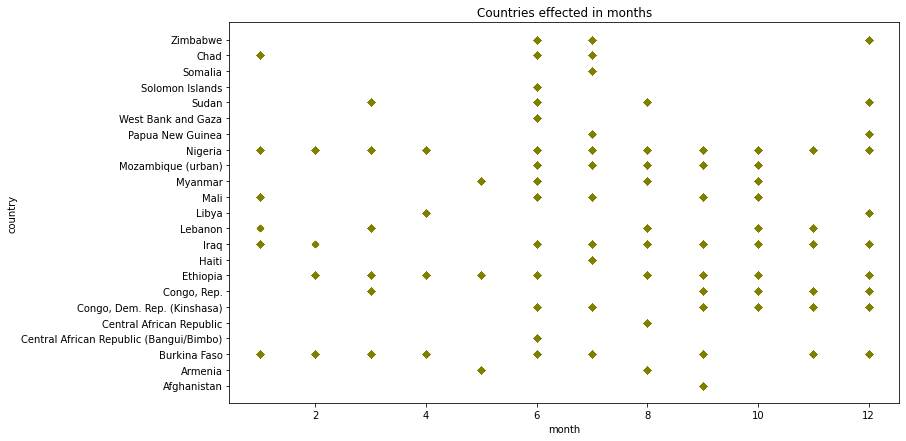

In [23]:
df_plot = pd.DataFrame(df_covid,columns=['country','wave','month'])
df_plot.plot(kind='scatter',x='month',y='country',style='xx',color="olive",figsize=(12, 7),marker='D')
plt.title('Countries effected in months')
plt.xlabel('month')
plt.show()

Visualizing frequency of surveys conducted using horizantal histogram


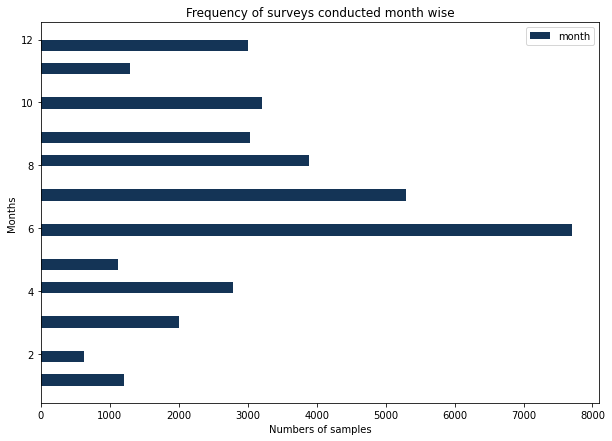

In [26]:
df_plot = pd.DataFrame(df_covid,columns=['ln_GDP_pc','month'])
df_plot.hist(column='month',
        grid=False,
        figsize=(10,7),
        legend=True,
        bins=30,
        orientation='horizontal',
        color='#143456')
plt.xlabel('Numbers of samples')
plt.ylabel("Months")
plt.title('Frequency of surveys conducted month wise');

Visualizing correlation between months and GDP frequencies using histogram

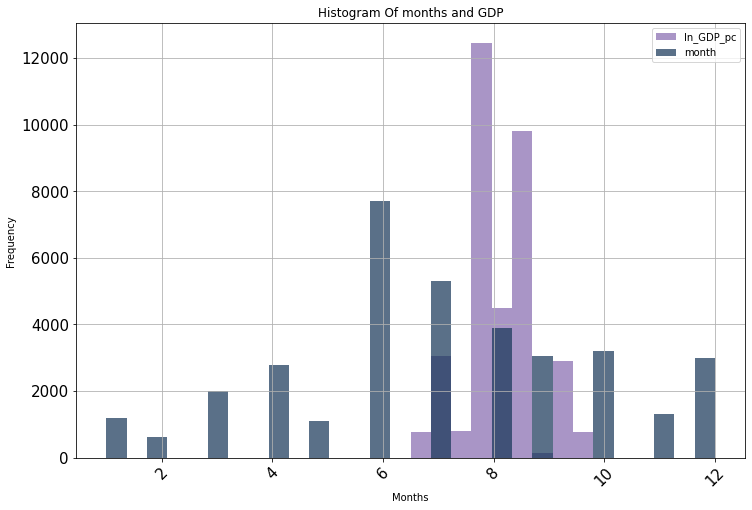

In [ ]:
df_plot = pd.DataFrame(df_covid,columns=['ln_GDP_pc','month'])
df_plot.plot(kind='hist',
        alpha=0.7,
        bins=30,
        title='Histogram Of months and GDP',
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=15, 
        color=['#8568AF', '#143456'])
plt.xlabel('Months')
plt.ylabel("Frequency ");

